<a href="https://colab.research.google.com/github/Mahesha-uop/HealthGuardian-Disease-Risk-Detector-using-h2o-wave/blob/main/train/Diabetes_Risk_Prediction_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 33 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
# If using google drive to have the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install h2o if haven't installed
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=10b0a8fc9dd2ca47953f5a2508b8b6e2801d48ff1d4667e25c61cdb5a4025bbf
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
 # Import necessary libraries from h2o
 import h2o
 from h2o.automl import H2OAutoML

In [ ]:
# Check instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8mqmldoh
  JVM stdout: /tmp/tmp8mqmldoh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8mqmldoh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_xw9yvu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import data in csv as a dataframe
file_path = '/content/drive/MyDrive/Machine Learning/H2O /diabetes.csv' # Give the file path. In my case google drive
Diabetes_details_df = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Recognize field in csv
Diabetes_details_df.types

{'Pregnancies': 'int',
 'Glucose': 'int',
 'BloodPressure': 'int',
 'SkinThickness': 'int',
 'Insulin': 'int',
 'BMI': 'real',
 'DiabetesPedigreeFunction': 'real',
 'Age': 'int',
 'Outcome': 'int'}

In [ ]:
# Visualize statics in data file
Diabetes_details_df.describe()

Rows:768
Cols:9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
type,int,int,int,int,int,real,real,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0,0.0
mean,3.845052083333336,120.89453125,69.10546874999994,20.536458333333357,79.79947916666666,31.99257812500003,0.4718763020833334,33.240885416666615,0.3489583333333333
maxs,17.0,199.0,122.0,99.0,846.0,67.1,2.42,81.0,1.0
sigma,3.36957806269887,31.972618195136224,19.355807170644777,15.952217567727642,115.24400235133803,7.884160320375441,0.331328595012775,11.760231540678689,0.47695137724279896
zeros,111,5,35,227,374,11,0,0,500
missing,0,0,0,0,0,0,0,0,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0


In [ ]:
# Split into train, validation and test data
Diabetes_data_train, Diabetes_data_test, Diabetes_data_valid = Diabetes_details_df.split_frame(ratios=[.8, .12])

In [ ]:
# Visualize train data
Diabetes_data_train.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


In [ ]:
# Take necessary fields as x and y
y = "Outcome"
x = Diabetes_details_df.columns
x.remove(y)

In [ ]:
# Train 10 models eliminating StackedEnsemble, DeepLearning
auto_ml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
# Train the model
auto_ml.train(x = x, y = y, training_frame = Diabetes_data_train, validation_frame= Diabetes_data_valid)

AutoML progress: |
19:42:12.270: Project: AutoML_1_20240219_194212
19:42:12.271: Cross-validation disabled by user: no fold column nor nfolds > 1.
19:42:12.272: Setting stopping tolerance adaptively based on the training frame: 0.04003203845127178
19:42:12.272: Build control seed: 10
19:42:12.274: training frame: Frame key: AutoML_1_20240219_194212_training_py_2_sid_8a22    cols: 9    rows: 624  chunks: 1    size: 7588  checksum: 8679063267218595246
19:42:12.275: validation frame: Frame key: py_4_sid_8a22    cols: 9    rows: 50  chunks: 1    size: 1203  checksum: 4688064132136554318
19:42:12.279: leaderboard frame: Frame key: py_4_sid_8a22    cols: 9    rows: 50  chunks: 1    size: 1203  checksum: 4688064132136554318
19:42:12.281: blending frame: NULL
19:42:12.281: response column: Outcome
19:42:12.281: fold column: null
19:42:12.281: weights column: null
19:42:12.321: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,40.0,40.0,58062.0,12.0,20.0,16.0,91.0,132.0,110.625
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-02-19 19:42:19,0.003 sec,0.0,nan,nan,nan,nan,nan,nan
,2024-02-19 19:42:19,0.116 sec,5.0,0.4894414,0.3043179,0.2395529,0.4401206,0.3508571,0.1937061
,2024-02-19 19:42:20,0.225 sec,10.0,0.4290236,0.2922774,0.1840613,0.4227925,0.3300952,0.1787535
,2024-02-19 19:42:20,0.304 sec,15.0,0.4090542,0.2922705,0.1673254,0.4205034,0.3338413,0.1768231
,2024-02-19 19:42:20,0.378 sec,20.0,0.4039799,0.2987726,0.1631997,0.4060216,0.3228355,0.1648535
,2024-02-19 19:42:20,0.446 sec,25.0,0.3980584,0.2998407,0.1584505,0.3899485,0.3045884,0.1520598
,2024-02-19 19:42:20,0.512 sec,30.0,0.3944561,0.3021216,0.1555956,0.4036864,0.3191570,0.1629627
,2024-02-19 19:42:20,0.582 sec,35.0,0.3926299,0.2995929,0.1541582,0.4126085,0.3277468,0.1702458


In [ ]:
# Get leader board to analysis performance of models
lb = auto_ml.leaderboard

In [ ]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XRT_1_AutoML_1_20240219_194212,0.408608,0.16696,0.321528,0.287925,0.16696
GBM_4_AutoML_1_20240219_194212,0.411574,0.169393,0.308464,0.288878,0.169393
GBM_2_AutoML_1_20240219_194212,0.417048,0.173929,0.315804,0.292151,0.173929
GBM_3_AutoML_1_20240219_194212,0.421488,0.177652,0.3156,0.296706,0.177652
DRF_1_AutoML_1_20240219_194212,0.423259,0.179149,0.323636,0.296609,0.179149
GBM_1_AutoML_1_20240219_194212,0.423296,0.17918,0.337482,0.298969,0.17918
GLM_1_AutoML_1_20240219_194212,0.423467,0.179324,0.360883,0.304391,0.179324
XGBoost_2_AutoML_1_20240219_194212,0.454595,0.206657,0.333447,0.321705,0.206657
XGBoost_3_AutoML_1_20240219_194212,0.457718,0.209506,0.333945,0.324284,0.209506
XGBoost_1_AutoML_1_20240219_194212,0.488869,0.238993,0.374902,0.339212,0.238993


In [ ]:
# Predictions
Diabetes_pred = auto_ml.leader.predict(Diabetes_data_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
Diabetes_pred.head()

predict
0.195
0.868182
0.499432
0.325
0.000297619
0.000297619
0.1
0.525
0.00386905
0.3


In [ ]:
# Best model for predictions
auto_ml.leader.model_performance(Diabetes_data_test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 0.23040255108450922
RMSE: 0.4800026573723412
MAE: 0.382312995060149
RMSLE: 0.327507965205352
Mean Residual Deviance: 0.23040255108450922

In [ ]:
# Get model ids
model_ids = list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model_ids

['XRT_1_AutoML_1_20240219_194212',
 'GBM_4_AutoML_1_20240219_194212',
 'GBM_2_AutoML_1_20240219_194212',
 'GBM_3_AutoML_1_20240219_194212',
 'DRF_1_AutoML_1_20240219_194212',
 'GBM_1_AutoML_1_20240219_194212',
 'GLM_1_AutoML_1_20240219_194212',
 'XGBoost_2_AutoML_1_20240219_194212',
 'XGBoost_3_AutoML_1_20240219_194212',
 'XGBoost_1_AutoML_1_20240219_194212']

In [ ]:
# Get the output model
out_xrt = h2o.get_model([mid for mid in model_ids if "XRT" in mid][0])

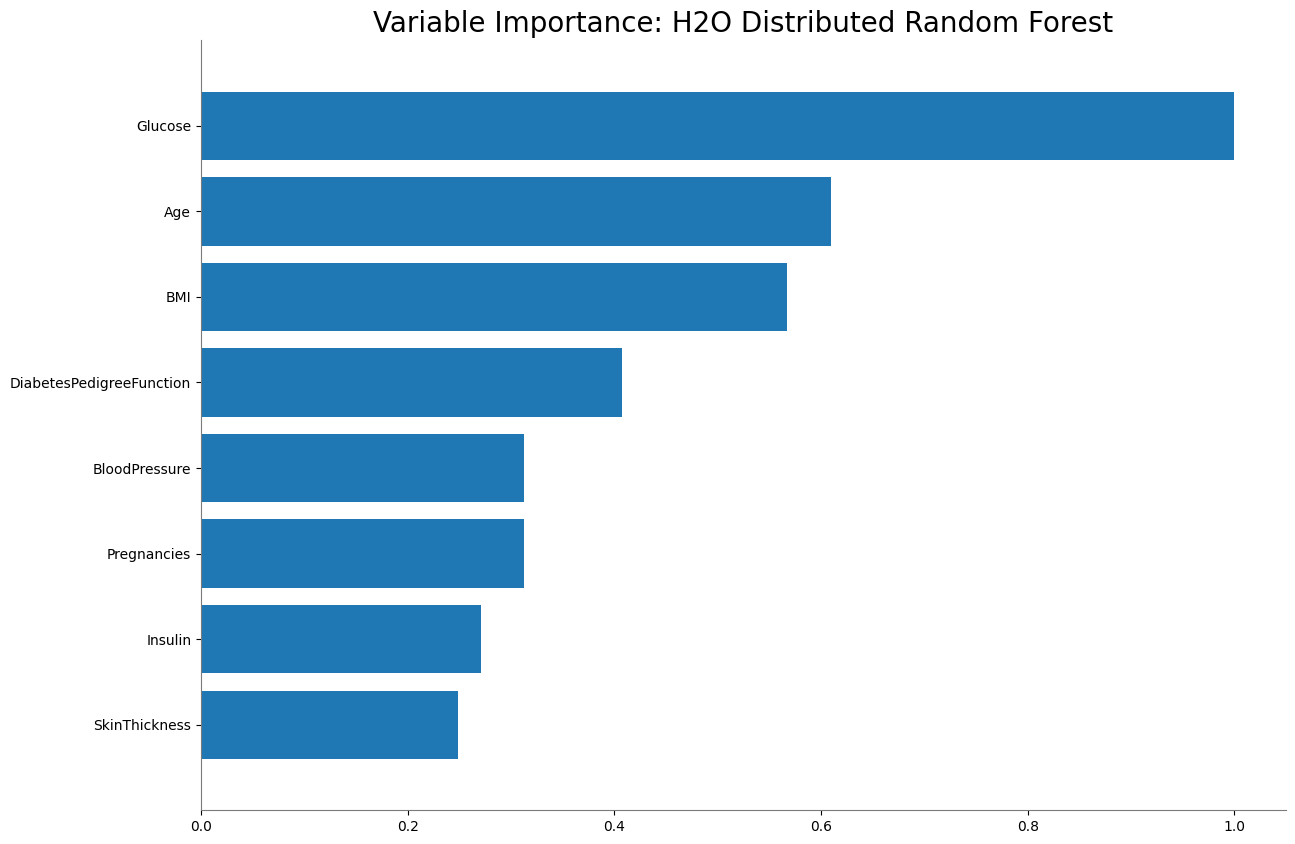

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot varible importance
out_xrt.varimp_plot()

In [ ]:
# Save the best model as a mojo
auto_ml.leader.download_mojo(path = "/content/drive/MyDrive/Machine Learning/Diabetes")

'/content/drive/MyDrive/Machine Learning/Diabetes'